In [1]:
# For Data Manipulation
import numpy as np
import pandas as pd
from datetime import datetime

# For Graphical Plots
import seaborn as sns
import matplotlib.pyplot as plt

# For Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics.pairwise import cosine_similarity

# ML Models used to fill null values
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# To visualize iterations
from tqdm import tqdm

# For reading files and data
import os

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Configure to display maximum columns
pd.set_option("display.max_columns",1000)

In [3]:
# Train data path - here paraquet files reside
train_folder = "C:/Users/tanve/OneDrive/Documents/HDFC/NBA_lookalike_POC/archive (1)/paraquet files"

# Names of all the files inside the train folder
train_files = os.listdir(train_folder)

# Sort the files (as we will concatenate it later)
train_files.sort(key=len)

# Daatframes list
train_df_list = []

# Iterate through each file and read
for file in tqdm(train_files):
    # Complete file path
    train_file_path = os.path.join(train_folder, file)
    # Read the parquet file
    train_file = pd.read_parquet(train_file_path)
    # Append the dataframes
    train_df_list.append(train_file)

# Concatenate all the files
train_df = pd.concat(train_df_list, axis=0)

# Delete train_df_list to save space
del train_df_list

# Print head of dataframe
train_df.head()

100%|██████████| 35/35 [00:14<00:00,  2.34it/s]


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2015-01-28,1375586.0,N,ES,H,35,2015-01-12,0.0,6,1.0,None,1.0,A,S,N,None,KHL,N,1.0,29.0,MALAGA,1.0,87218.101562,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-28,1050611.0,N,ES,V,23,2012-08-10,0.0,35,1.0,None,1,I,S,S,None,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.738281,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-28,1050612.0,N,ES,V,23,2012-08-10,0.0,35,1.0,None,1,I,S,N,None,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.109375,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-28,1050613.0,N,ES,H,22,2012-08-10,0.0,35,1.0,None,1,I,S,N,None,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.539062,03 - UNIVERSITARIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-28,1050614.0,N,ES,V,23,2012-08-10,0.0,35,1.0,None,1,A,S,N,None,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Drop the index
train_df.reset_index(drop=True, inplace=True)

# Print head of data frame
train_df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586.0,N,ES,H,35,2015-01-12,0.0,6,1.0,None,1.0,A,S,N,None,KHL,N,1.0,29.0,MALAGA,1.0,87218.101562,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-28,1050611.0,N,ES,V,23,2012-08-10,0.0,35,1.0,None,1,I,S,S,None,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.738281,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-28,1050612.0,N,ES,V,23,2012-08-10,0.0,35,1.0,None,1,I,S,N,None,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.109375,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-28,1050613.0,N,ES,H,22,2012-08-10,0.0,35,1.0,None,1,I,S,N,None,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.539062,03 - UNIVERSITARIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-28,1050614.0,N,ES,V,23,2012-08-10,0.0,35,1.0,None,1,A,S,N,None,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_df.drop(columns=['ult_fec_cli_1t','conyuemp'], inplace=True)

In [6]:
# Define label encoder object
le = LabelEncoder()

# Convert one-hot encoded vectors to a single column
raw_target = train_df.iloc[:, 22:].idxmax(1)

# Fit transform the labels
transformed_target = le.fit_transform(raw_target)

# Concatenate the column to dataframe
train_df['service_opted'] = transformed_target

# Typecaste to uint8 to save memory
train_df['service_opted'] = train_df['service_opted'].astype('uint8')

# Print the dataframe
train_df.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,service_opted
0,2015-01-28,1375586.0,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.101562,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,2015-01-28,1050611.0,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.738281,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,2015-01-28,1050612.0,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.109375,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2015-01-28,1050613.0,N,ES,H,22,2012-08-10,0.0,35,1.0,1,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.539062,03 - UNIVERSITARIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,2015-01-28,1050614.0,N,ES,V,23,2012-08-10,0.0,35,1.0,1,A,S,N,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,2015-01-28,1050615.0,N,ES,H,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,45.0,TOLEDO,0.0,22220.039062,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,2015-01-28,1050616.0,N,ES,H,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,24.0,LEON,0.0,295590.375000,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,2015-01-28,1050617.0,N,ES,H,23,2012-08-10,0.0,35,1.0,1,A,S,N,KHE,N,1.0,50.0,ZARAGOZA,1.0,113316.656250,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2015-01-28,1050619.0,N,ES,H,24,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,20.0,GIPUZKOA,0.0,NaN,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2015-01-28,1050620.0,N,ES,H,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,10.0,CACERES,0.0,113194.976562,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [7]:
data_desc = pd.read_csv(r"C:\Users\tanve\OneDrive\Documents\HDFC\NBA_lookalike_POC\data_desc.csv")

In [8]:
train_df['fecha_alta']=pd.to_datetime(train_df['fecha_alta'])

In [9]:
train_df.rename(columns={'ncodpers':'user',
                        'fecha_alta':'time',
                        'service_opted':'label'},inplace=True)

In [10]:
train_df['item']=raw_target

In [11]:
train_df.head()

,fecha_dato,user,ind_empleado,pais_residencia,sexo,age,time,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,label,item
0,2015-01-28,1375586.0,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.101562,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,ind_cco_fin_ult1
1,2015-01-28,1050611.0,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.738281,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,ind_cco_fin_ult1
2,2015-01-28,1050612.0,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.109375,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,ind_cco_fin_ult1
3,2015-01-28,1050613.0,N,ES,H,22,2012-08-10,0.0,35,1.0,1,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.539062,03 - UNIVERSITARIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,ind_deco_fin_ult1
4,2015-01-28,1050614.0,N,ES,V,23,2012-08-10,0.0,35,1.0,1,A,S,N,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,ind_cco_fin_ult1


In [12]:
train_df.shape

(13647309, 48)

In [13]:
cleaned_df = train_df.dropna()

In [14]:
train_df=cleaned_df

In [15]:
train_df.head()

,fecha_dato,user,ind_empleado,pais_residencia,sexo,age,time,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,label,item
0,2015-01-28,1375586.0,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.101562,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,ind_cco_fin_ult1
1,2015-01-28,1050611.0,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.738281,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,ind_cco_fin_ult1
2,2015-01-28,1050612.0,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.109375,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,ind_cco_fin_ult1
3,2015-01-28,1050613.0,N,ES,H,22,2012-08-10,0.0,35,1.0,1,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.539062,03 - UNIVERSITARIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,ind_deco_fin_ult1
5,2015-01-28,1050615.0,N,ES,H,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,45.0,TOLEDO,0.0,22220.039062,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,ind_cco_fin_ult1


In [16]:
train_df['age']=train_df['age'].apply(eval)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10795392 entries, 0 to 13647307
Data columns (total 48 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   fecha_dato             object        
 1   user                   float32       
 2   ind_empleado           object        
 3   pais_residencia        object        
 4   sexo                   object        
 5   age                    int64         
 6   time                   datetime64[ns]
 7   ind_nuevo              float32       
 8   antiguedad             object        
 9   indrel                 float32       
 10  indrel_1mes            object        
 11  tiprel_1mes            object        
 12  indresi                object        
 13  indext                 object        
 14  canal_entrada          object        
 15  indfall                object        
 16  tipodom                float32       
 17  cod_prov               float32       
 18  nomprov             

In [18]:
numeric_columns = train_df.select_dtypes(include='number').columns.tolist()

In [19]:
cat_cols=train_df.select_dtypes(include='object').columns.tolist()

In [20]:
train_df=train_df[['user','item','label','time', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'time',
       'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']]

In [21]:
train_df.head(3)

,user,item,label,time,ind_empleado,pais_residencia,sexo,age,time,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586.0,ind_cco_fin_ult1,2,2015-01-12,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.101562,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1050611.0,ind_cco_fin_ult1,2,2012-08-10,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.738281,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1050612.0,ind_cco_fin_ult1,2,2012-08-10,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.109375,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
numeric_columns

['user',
 'age',
 'ind_nuevo',
 'indrel',
 'tipodom',
 'cod_prov',
 'ind_actividad_cliente',
 'renta',
 'ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1',
 'label']

In [23]:
train_df['antiguedad']=train_df['antiguedad'].apply(eval)

In [24]:
train_df = train_df.loc[:, ~train_df.columns.duplicated()]

In [25]:
train_df['antiguedad'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10795392 entries, 0 to 13647307
Series name: antiguedad
Non-Null Count     Dtype
--------------     -----
10795392 non-null  int64
dtypes: int64(1)
memory usage: 164.7 MB


In [26]:
data_desc.iloc[:24,:]

,Column Name,Description
0,fecha_dato,The table is partitioned for this column
1,ncodpers,Customer code
2,ind_empleado,"Employee index: A active, B ex employed, F fil..."
3,pais_residencia,Customer's Country residence
4,sexo,Customer's sex
5,age,Age
6,fecha_alta,The date in which the customer became as the f...
7,ind_nuevo,New customer Index. 1 if the customer register...
8,antiguedad,Customer seniority (in months)
9,indrel,"1 (First/Primary), 99 (Primary customer during..."


In [27]:
from libreco.data import random_split
first_half_data = train_df[: (len(train_df) // 2)]
train_data, eval_data, test_data = random_split(first_half_data, multi_ratios=[0.8, 0.1, 0.1], seed=42)

In [29]:
eval_data.head()

,user,item,label,time,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
3458293,1221713.0,ind_cco_fin_ult1,2,2013-11-19,N,ES,H,23,0.0,20,1.0,1.0,I,S,N,KHE,N,1.0,47.0,VALLADOLID,0.0,121094.609375,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3897616,913957.0,ind_ctma_fin_ult1,6,2011-05-30,N,ES,V,70,0.0,50,1.0,1,I,S,N,KFA,N,1.0,28.0,MADRID,0.0,242985.875000,02 - PARTICULARES,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2459589,1142488.0,ind_cco_fin_ult1,2,2013-07-18,N,ES,H,24,0.0,24,1.0,1,I,S,N,KHE,N,1.0,30.0,MURCIA,0.0,244860.906250,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3563028,37293.0,ind_ahor_fin_ult1,0,2000-06-28,N,ES,H,73,0.0,231,1.0,1.0,A,S,N,KAT,N,1.0,28.0,MADRID,0.0,127041.390625,02 - PARTICULARES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4684714,837524.0,ind_ahor_fin_ult1,0,2009-03-05,N,ES,V,47,0.0,77,1.0,1.0,I,S,N,KFP,N,1.0,41.0,SEVILLA,0.0,47586.601562,02 - PARTICULARES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
import numpy as np
import pandas as pd
from libreco.data import split_by_num, DatasetFeat
from libreco.algorithms import YouTubeRanking,WideDeep  # feat data, algorithm YouTubeRanking


# specify complete columns information
sparse_col =['ind_empleado',
 'pais_residencia',
 'sexo',
 'indrel_1mes',
 'tiprel_1mes',
 'indresi',
 'indext',
 'canal_entrada',
 'indfall',
 'nomprov',
 'segmento']
dense_col = ['age','antiguedad',
 'ind_nuevo',
 'indrel',
 'ind_actividad_cliente',
 'renta']
user_col = sparse_col+dense_col
item_col = []

train_data, data_info = DatasetFeat.build_trainset(train_data, user_col, item_col, sparse_col, dense_col)
eval_data = DatasetFeat.build_evalset(eval_data)
test_data = DatasetFeat.build_testset(test_data)
print(data_info)  

ytb_ranking = YouTubeRanking(
    task="ranking",
    data_info=data_info,
    embed_size=16,
    n_epochs=3,
    lr=1e-4,
    batch_size=2014,
    use_bn=True,
    hidden_units=(128, 64, 32),
)
ytb_ranking.fit(
    train_data,
    neg_sampling=True,
    verbose=2,
    shuffle=True,
    eval_data=test_data,
    metrics=["loss", "roc_auc", "precision", "recall", "map", "ndcg"],
)


In [73]:
from libreco.evaluation import evaluate

evaluate(
    model=ytb_ranking, 
    data=test_data, 
    neg_sampling=True,  # perform negative sampling on test data
    metrics=["loss", "roc_auc", "precision", "recall", "ndcg"],
)

eval_listwise: 100%|██████████| 948/948 [01:08<00:00, 13.89it/s]


{'loss': 0.9213880707950455,
 'roc_auc': 0.81397374220016,
 'precision': 0.0006138330671223209,
 'recall': 0.004747429722356359,
 'ndcg': 0.004292292649838295}

In [74]:
train_df.head()

,user,item,label,time,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586.0,ind_cco_fin_ult1,2,2015-01-12,N,ES,H,35,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.101562,02 - PARTICULARES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1050611.0,ind_cco_fin_ult1,2,2012-08-10,N,ES,V,23,0.0,35,1.0,1,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.738281,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1050612.0,ind_cco_fin_ult1,2,2012-08-10,N,ES,V,23,0.0,35,1.0,1,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.109375,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1050613.0,ind_deco_fin_ult1,9,2012-08-10,N,ES,H,22,0.0,35,1.0,1,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.539062,03 - UNIVERSITARIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1050615.0,ind_cco_fin_ult1,2,2012-08-10,N,ES,H,23,0.0,35,1.0,1,I,S,N,KHE,N,1.0,45.0,TOLEDO,0.0,22220.039062,03 - UNIVERSITARIO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


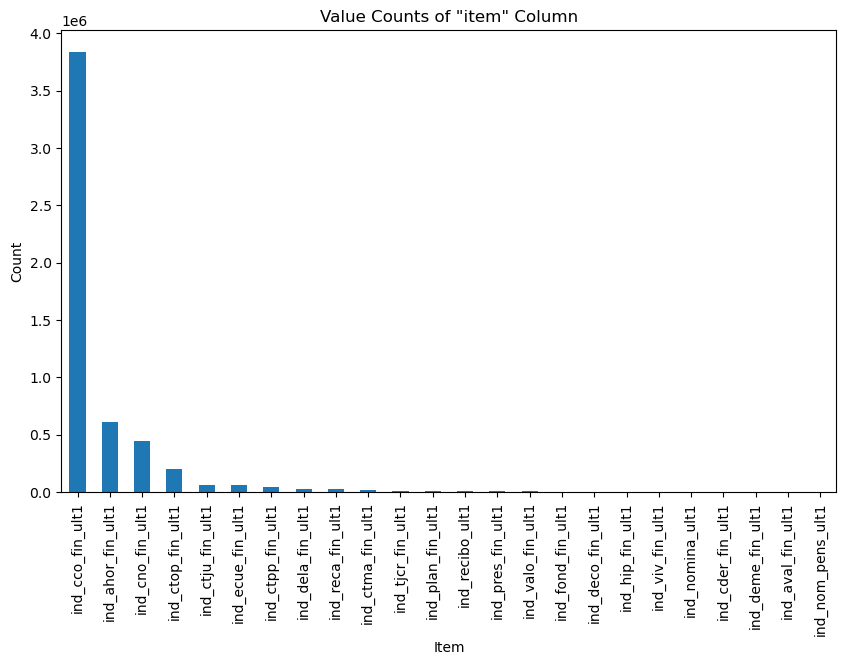

In [75]:
import matplotlib.pyplot as plt

# Assuming train_df is your DataFrame
item_value_counts = first_half_data['item'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
item_value_counts.plot(kind='bar')
plt.title('Value Counts of "item" Column')
plt.xlabel('Item')
plt.ylabel('Count')
plt.show()

In [79]:
df = pd.DataFrame.from_dict(data, orient='index')
df.index.name = 'Key'
df.columns = [f'Value_{i}' for i in range(len(df.columns))]

In [80]:
df

,Value_0
Key,
1375586.0,"[ind_cno_fin_ult1, ind_reca_fin_ult1, ind_reci..."
1050611.0,"[ind_ahor_fin_ult1, ind_recibo_ult1, ind_cno_f..."
1050612.0,"[ind_ahor_fin_ult1, ind_recibo_ult1, ind_cno_f..."
1050613.0,"[ind_recibo_ult1, ind_ahor_fin_ult1, ind_cco_f..."
1050615.0,"[ind_ahor_fin_ult1, ind_recibo_ult1, ind_cno_f..."
...,...
1444790.0,"[ind_cco_fin_ult1, ind_recibo_ult1, ind_cno_fi..."
1444791.0,"[ind_cno_fin_ult1, ind_ctju_fin_ult1, ind_reca..."
1444792.0,"[ind_cno_fin_ult1, ind_recibo_ult1, ind_ahor_f..."


In [81]:
# Split lists into separate columns
df = pd.DataFrame(df['Value_0'].tolist(), index=df.index).add_prefix('rank_')

# Concatenate the split columns with the original DataFrame
df = pd.concat([df, df], axis=1)

df

,rank_0,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,rank_11,rank_12,rank_13,rank_14,rank_15,rank_16,rank_17,rank_18,rank_19,rank_20,rank_21,rank_22,rank_0,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,rank_11,rank_12,rank_13,rank_14,rank_15,rank_16,rank_17,rank_18,rank_19,rank_20,rank_21,rank_22
Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1375586.0,ind_cno_fin_ult1,ind_reca_fin_ult1,ind_recibo_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_ctop_fin_ult1,ind_ahor_fin_ult1,ind_valo_fin_ult1,ind_ctpp_fin_ult1,ind_ctma_fin_ult1,ind_tjcr_fin_ult1,ind_nomina_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_ctju_fin_ult1,ind_deco_fin_ult1,ind_nom_pens_ult1,ind_cder_fin_ult1,ind_deme_fin_ult1,ind_pres_fin_ult1,ind_aval_fin_ult1,ind_plan_fin_ult1,ind_viv_fin_ult1,ind_cno_fin_ult1,ind_reca_fin_ult1,ind_recibo_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_ctop_fin_ult1,ind_ahor_fin_ult1,ind_valo_fin_ult1,ind_ctpp_fin_ult1,ind_ctma_fin_ult1,ind_tjcr_fin_ult1,ind_nomina_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_ctju_fin_ult1,ind_deco_fin_ult1,ind_nom_pens_ult1,ind_cder_fin_ult1,ind_deme_fin_ult1,ind_pres_fin_ult1,ind_aval_fin_ult1,ind_plan_fin_ult1,ind_viv_fin_ult1
1050611.0,ind_ahor_fin_ult1,ind_recibo_ult1,ind_cno_fin_ult1,ind_dela_fin_ult1,ind_reca_fin_ult1,ind_nomina_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_ecue_fin_ult1,ind_ctma_fin_ult1,ind_ctju_fin_ult1,ind_valo_fin_ult1,ind_nom_pens_ult1,ind_fond_fin_ult1,ind_cder_fin_ult1,ind_tjcr_fin_ult1,ind_deme_fin_ult1,ind_deco_fin_ult1,ind_aval_fin_ult1,ind_viv_fin_ult1,ind_pres_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_ahor_fin_ult1,ind_recibo_ult1,ind_cno_fin_ult1,ind_dela_fin_ult1,ind_reca_fin_ult1,ind_nomina_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_ecue_fin_ult1,ind_ctma_fin_ult1,ind_ctju_fin_ult1,ind_valo_fin_ult1,ind_nom_pens_ult1,ind_fond_fin_ult1,ind_cder_fin_ult1,ind_tjcr_fin_ult1,ind_deme_fin_ult1,ind_deco_fin_ult1,ind_aval_fin_ult1,ind_viv_fin_ult1,ind_pres_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1
1050612.0,ind_ahor_fin_ult1,ind_recibo_ult1,ind_cno_fin_ult1,ind_reca_fin_ult1,ind_dela_fin_ult1,ind_ctju_fin_ult1,ind_ctop_fin_ult1,ind_ctma_fin_ult1,ind_nomina_ult1,ind_ecue_fin_ult1,ind_ctpp_fin_ult1,ind_valo_fin_ult1,ind_nom_pens_ult1,ind_fond_fin_ult1,ind_tjcr_fin_ult1,ind_cder_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_aval_fin_ult1,ind_hip_fin_ult1,ind_viv_fin_ult1,ind_pres_fin_ult1,ind_plan_fin_ult1,ind_ahor_fin_ult1,ind_recibo_ult1,ind_cno_fin_ult1,ind_reca_fin_ult1,ind_dela_fin_ult1,ind_ctju_fin_ult1,ind_ctop_fin_ult1,ind_ctma_fin_ult1,ind_nomina_ult1,ind_ecue_fin_ult1,ind_ctpp_fin_ult1,ind_valo_fin_ult1,ind_nom_pens_ult1,ind_fond_fin_ult1,ind_tjcr_fin_ult1,ind_cder_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_aval_fin_ult1,ind_hip_fin_ult1,ind_viv_fin_ult1,ind_pres_fin_ult1,ind_plan_fin_ult1
1050613.0,ind_recibo_ult1,ind_ahor_fin_ult1,ind_cco_fin_ult1,ind_nomina_ult1,ind_reca_fin_ult1,ind_ctop_fin_ult1,ind_tjcr_fin_ult1,ind_ctju_fin_ult1,ind_hip_fin_ult1,ind_dela_fin_ult1,ind_cno_fin_ult1,ind_ctma_fin_ult1,ind_deco_fin_ult1,ind_fond_fin_ult1,ind_viv_fin_ult1,ind_ecue_fin_ult1,ind_nom_pens_ult1,ind_deme_fin_ult1,ind_cder_fin_ult1,ind_pres_fin_ult1,ind_ctpp_fin_ult1,ind_aval_fin_ult1,ind_valo_fin_ult1,ind_recibo_ult1,ind_ahor_fin_ult1,ind_cco_fin_ult1,ind_nomina_ult1,ind_reca_fin_ult1,ind_ctop_fin_ult1,ind_tjcr_fin_ult1,ind_ctju_fin_ult1,ind_hip_fin_ult1,ind_dela_fin_ult1,ind_cno_fin_ult1,ind_ctma_fin_ult1,ind_deco_fin_ult1,ind_fond_fin_ult1,ind_viv_fin_ult1,ind_ecue_fin_ult1,ind_nom_pens_ult1,ind_deme_fin_ult1,ind_cder_fin_ult1,ind_pres_fin_ult1,ind_ctpp_fin_ult1,ind_aval_fin_ult1,ind_valo_fin_ult1
1050615.0,ind_ahor_fin_ult1,ind_recibo_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctop_fin_ult1,ind_dela_fin_ult1,ind_reca_fin_ult1,ind_nomina_ult1,ind_ctpp_fin_ult1,ind_nom_pens_ult1,ind_ctma_fin_ult1,ind_valo_fin_ult1,ind_ecue_fin_ult1,ind_cder_fin_ult1,ind_fond_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_u

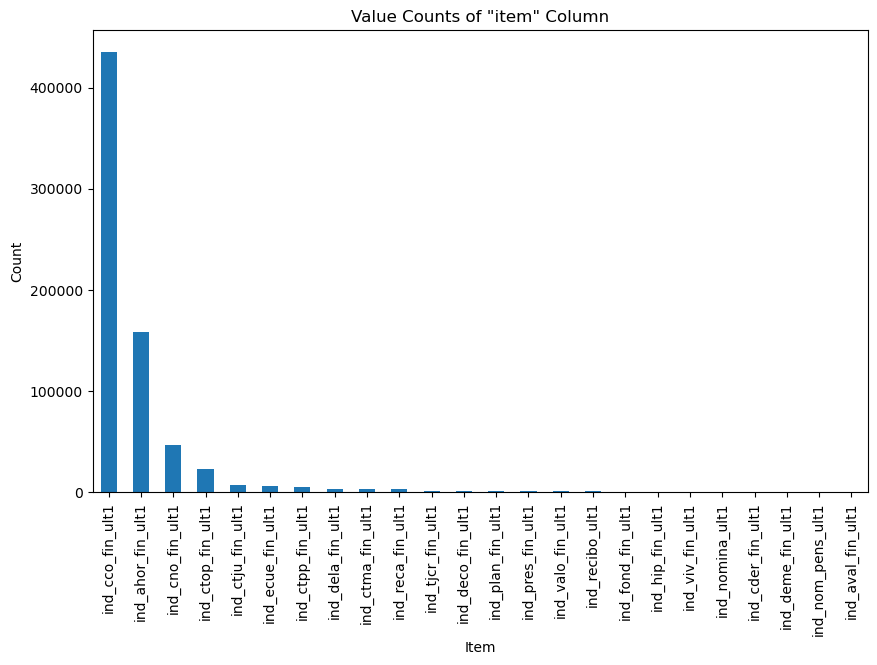

In [82]:
import matplotlib.pyplot as plt

# Assuming train_df is your DataFrame
item_value_counts = first_half_data.drop_duplicates(subset='user')['item'].value_counts()
# Plotting
plt.figure(figsize=(10, 6))
item_value_counts.plot(kind='bar')
plt.title('Value Counts of "item" Column')
plt.xlabel('Item')
plt.ylabel('Count')
plt.show()


In [83]:
item_value_counts = first_half_data.drop_duplicates(subset='user')['item'].value_counts()/first_half_data.drop_duplicates(subset='user').value_counts().sum()

In [84]:
item_value_counts

ind_cco_fin_ult1     0.623523
ind_ahor_fin_ult1    0.227719
ind_cno_fin_ult1     0.066526
ind_ctop_fin_ult1    0.032276
ind_ctju_fin_ult1    0.010120
ind_ecue_fin_ult1    0.008414
ind_ctpp_fin_ult1    0.007388
ind_dela_fin_ult1    0.005274
ind_ctma_fin_ult1    0.004114
ind_reca_fin_ult1    0.003862
ind_tjcr_fin_ult1    0.002142
ind_deco_fin_ult1    0.001574
ind_plan_fin_ult1    0.001458
ind_pres_fin_ult1    0.001142
ind_valo_fin_ult1    0.001081
ind_recibo_ult1      0.001048
ind_fond_fin_ult1    0.000816
ind_hip_fin_ult1     0.000548
ind_viv_fin_ult1     0.000473
ind_nomina_ult1      0.000254
ind_cder_fin_ult1    0.000093
ind_deme_fin_ult1    0.000086
ind_nom_pens_ult1    0.000044
ind_aval_fin_ult1    0.000026
Name: item, dtype: float64

In [85]:
data_desc.iloc[24:,:]

,Column Name,Description
24,ind_ahor_fin_ult1,Saving Account
25,ind_aval_fin_ult1,Guarantees
26,ind_cco_fin_ult1,Current Accounts
27,ind_cder_fin_ult1,Derivada Account
28,ind_cno_fin_ult1,Payroll Account
29,ind_ctju_fin_ult1,Junior Account
30,ind_ctma_fin_ult1,Más particular Account
31,ind_ctop_fin_ult1,particular Account
32,ind_ctpp_fin_ult1,particular Plus Account
33,ind_deco_fin_ult1,Short-term deposits


In [86]:
df = df.loc[:, ~df.columns.duplicated()]

In [87]:
first_half_data.shape

(5397696, 47)

In [88]:
df1=pd.DataFrame(df['rank_0'].value_counts())
df2=pd.DataFrame(df['rank_1'].value_counts())
df3=pd.DataFrame(df['rank_2'].value_counts())
df4=pd.DataFrame(df['rank_3'].value_counts())
df5=pd.DataFrame(df['rank_4'].value_counts())

In [89]:
result = pd.merge(df1, df2, left_index=True, right_index=True)
result = pd.merge(result, df3, left_index=True, right_index=True)

# Rename columns
result.columns = ['rank_0_count', 'rank_1_count', 'rank_2_count']


In [90]:
result['total_sum']=result.sum(axis=1)

In [91]:
result['percent_rec']=result['total_sum']/result['total_sum'].sum(axis=0)

In [92]:
result

,rank_0_count,rank_1_count,rank_2_count,total_sum,percent_rec
ind_cco_fin_ult1,228381,29439,9702,267522,0.127828
ind_ahor_fin_ult1,166441,62235,56545,285221,0.136285
ind_cno_fin_ult1,95065,54785,165221,315071,0.150548
ind_reca_fin_ult1,64416,44840,49656,158912,0.075932
ind_dela_fin_ult1,51928,34875,49164,135967,0.064968
ind_recibo_ult1,28696,218639,61303,308638,0.147474
ind_ecue_fin_ult1,23725,69670,80137,173532,0.082918
ind_ctop_fin_ult1,13275,58785,92608,164668,0.078682
ind_tjcr_fin_ult1,9766,45982,39287,95035,0.045410
ind_ctpp_fin_ult1,4062,16202,22636,42900,0.020499
